In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import pickle 
def generate_menstrual_cycle_dataset(num_samples=1000):
    """
    Generate a synthetic dataset for menstrual cycle prediction
    
    Parameters:
    num_samples (int): Number of samples to generate
    
    Returns:
    pandas.DataFrame: Synthetic dataset of menstrual cycle parameters
    """
    np.random.seed(42)
    
    # Generate synthetic data
    data = {
        'age': np.random.normal(30, 5, num_samples),  # Mean 30, std 5
        'cycle_length': np.random.normal(28, 3, num_samples),  # Mean 28, std 3
        'period_length': np.random.normal(5, 1, num_samples),  # Mean 5, std 1
        'stress_level': np.random.uniform(0, 10, num_samples),  # 0-10 scale
        'previous_cycle_variation': np.random.normal(0, 2, num_samples),  # Variation in previous cycle
        'hormonal_changes': np.random.normal(0, 1, num_samples),  # Hormonal fluctuations
        'next_period_days': np.zeros(num_samples)  # Target variable to predict
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Generate more realistic next period days based on other features
    df['next_period_days'] = (
        df['cycle_length'] + 
        df['previous_cycle_variation'] + 
        (df['stress_level'] / 3) - 
        (df['hormonal_changes'] * 0.5)
    ).round(0)
    
    # Ensure next_period_days is within reasonable range
    df['next_period_days'] = df['next_period_days'].clip(21, 35)
    
    return df

df = generate_menstrual_cycle_dataset(5000)

#df.to_csv('output.csv', index=False) 

#df=pd.read_csv('dataset.csv')


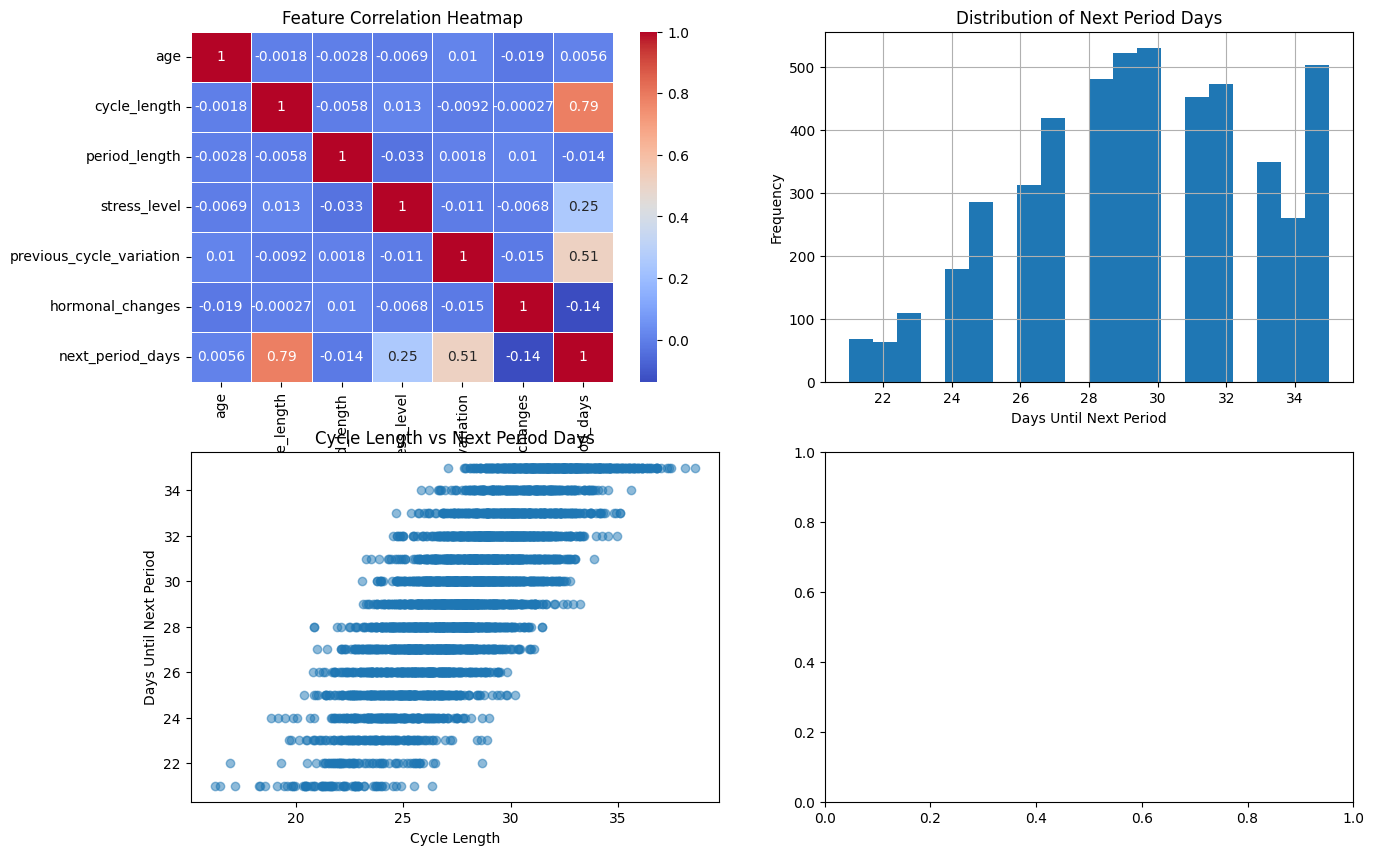

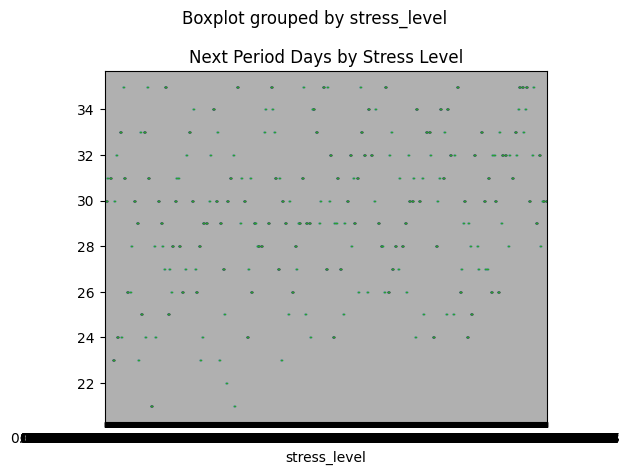

In [2]:

plt.figure(figsize=(15, 10))

# Correlation Heatmap
plt.subplot(2, 2, 1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

# Distribution of Next Period Days
plt.subplot(2, 2, 2)
df['next_period_days'].hist(bins=20)
plt.title('Distribution of Next Period Days')
plt.xlabel('Days Until Next Period')
plt.ylabel('Frequency')

# Scatter plot of Cycle Length vs Next Period Days
plt.subplot(2, 2, 3)
plt.scatter(df['cycle_length'], df['next_period_days'], alpha=0.5)
plt.title('Cycle Length vs Next Period Days')
plt.xlabel('Cycle Length')
plt.ylabel('Days Until Next Period')

# Box plot of Next Period Days by Stress Level
plt.subplot(2, 2, 4)
df.boxplot(column='next_period_days', by='stress_level')
plt.title('Next Period Days by Stress Level')

plt.tight_layout()
plt.show()

In [9]:

# Prepare data for machine learning
X = df.drop('next_period_days', axis=1)
y = df['next_period_days']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print(f"Mean Absolute Error: {mae:.2f} days")
print(f"Root Mean Squared Error: {rmse:.2f} days")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)
file=open("model_object.obj","wb")
pickle.dump(rf_model,file)



Model Performance Metrics:
Mean Absolute Error: 0.38 days
Root Mean Squared Error: 0.49 days

Feature Importance:
                    feature  importance
1              cycle_length    0.646492
4  previous_cycle_variation    0.269361
3              stress_level    0.063331
5          hormonal_changes    0.014717
0                       age    0.003111
2             period_length    0.002988
